<a href="https://colab.research.google.com/github/jmParkGit/Colab/blob/main/Sparta_deepLearningWithImage/week5/%EA%B7%B8%EB%A0%88%EC%9D%B4%EC%8A%A4%EC%BC%80%EC%9D%BC%EC%82%AC%EC%A7%84%EC%9D%84_%EC%BB%AC%EB%9F%AC%EB%A1%9C_%EB%B0%94%EA%BE%B8%EA%B8%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

패키지 로드

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 모델 불러오기

In [2]:
proto = 'models/colorization_deploy_v2.prototxt'
weights = 'models/colorization_release_v2.caffemodel'

net = cv2.dnn.readNetFromCaffe(proto, weights)

pts_in_hull = np.load('models/pts_in_hull.npy')
pts_in_hull = pts_in_hull.transpose().reshape(2, 313, 1, 1).astype(np.float32)
net.getLayer(net.getLayerId('class8_ab')).blobs = [pts_in_hull]

net.getLayer(net.getLayerId('conv8_313_rh')).blobs = [np.full((1, 313), 2.606, np.float32)]

# 이미지 전처리하기

In [3]:
img = cv2.imread('imgs/05.jpg')

h, w, c = img.shape

img_input = img.copy()

img_input = img_input.astype('float32') / 255.
img_lab = cv2.cvtColor(img_input, cv2.COLOR_BGR2Lab)
img_l = img_lab[:, :, 0:1]

# 그레이스케일을 컬러로 바꾸기

In [4]:
blob = cv2.dnn.blobFromImage(img_l, size=(224, 224), mean=[50, 50, 50])

net.setInput(blob)
output = net.forward()

output = output.squeeze().transpose((1,2,0))

output_resized=cv2.resize(output,(w,h))

output_lab = np.concatenate([img_l,output_resized], axis=2)

output_bgr = cv2.cvtColor(output_lab, cv2.COLOR_Lab2BGR)
output_bgr = output_bgr * 255
output_bgr = np.clip(output_bgr,0,255)
output_bgr = output_bgr.astype('uint8')

# 특정부분만 컬러로 합성하기 위한 마스크 만들기

In [5]:
mask=np.zeros_like(img,dtype='uint8')
mask=cv2.rectangle(mask, pt1=(220,100), pt2=(400,360), color=(1,1,1), thickness=-1)

# 마스크와 이미지 합성하여 특정부분만 컬러로 된 이미지 만들기

In [6]:
color = output_bgr * mask
gray = img * (1 - mask)

output2 = color + gray

# 입력사진 및 결과사진

input


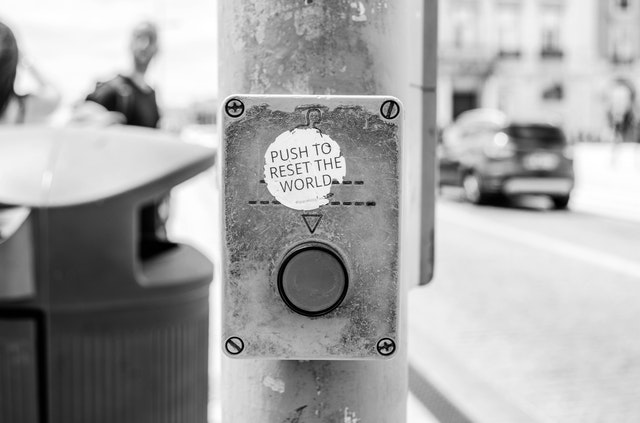

result1


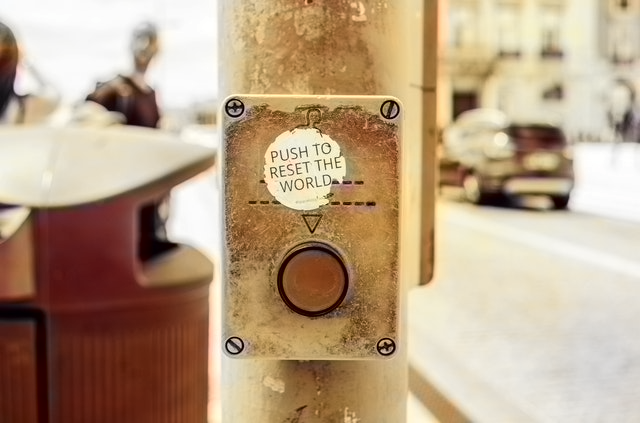

result2


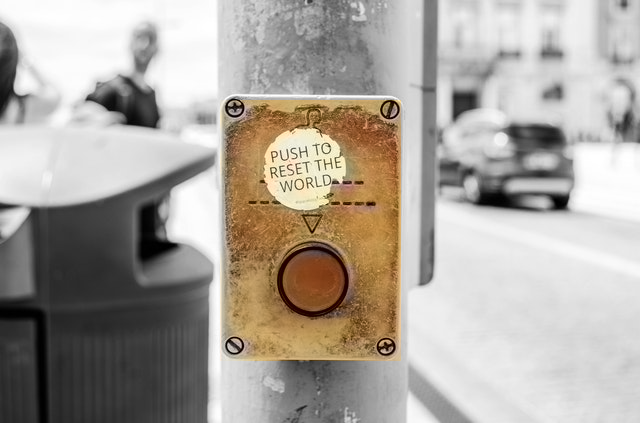

In [7]:
print('input')
cv2_imshow(img)
print('result1')
cv2_imshow(output_bgr)
print('result2')
cv2_imshow(output2)